In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

Fuente de info
https://www.puentenet.com/herramientas/exportar-precios

In [58]:
df = pd.read_csv('Divisas.csv', header=1)
df.head()

,Instrumento,Fecha,Unnamed: 2,Precio,Var %,Var Anual %,Unnamed: 6,TIR %,Mod. Duration (años)
0,ARS,28/11/2019,NaN,"59,77","-0,22",NaN,NaN,NaN,NaN
1,ARS,27/11/2019,NaN,"59,90","0,13",NaN,NaN,NaN,NaN
2,ARS,26/11/2019,NaN,"59,82","0,50",NaN,NaN,NaN,NaN
3,ARS,25/11/2019,NaN,"59,53","0,00",NaN,NaN,NaN,NaN
4,ARS,22/11/2019,NaN,"59,78","-0,02",NaN,NaN,NaN,NaN


In [59]:
df.Precio = df.Precio.str.replace(',','.').astype(float)
df['Var %'] = df['Var %'].str.replace(',','.').astype(float)

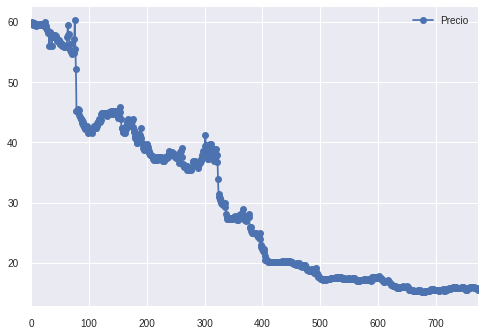

In [60]:
df[(df.Instrumento == 'ARS')][['Precio']].plot(marker='o')

In [61]:
df = df.loc[:,['Instrumento','Fecha','Precio']]
df.Fecha = pd.to_datetime(df.Fecha, format='%d/%m/%Y')

In [62]:
df=df.set_index('Fecha').sort_index()

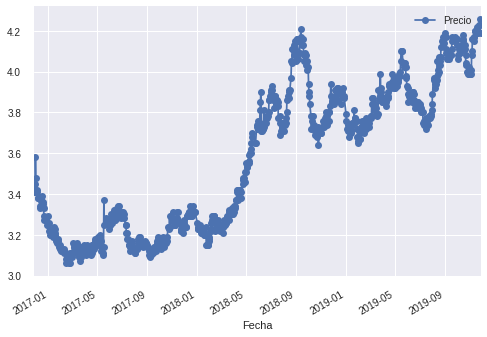

In [63]:
df[(df.Instrumento == 'BRL')][['Precio']].plot(marker='o')

In [64]:
df_gr = df.groupby(['Fecha','Instrumento']).mean()
df_gr.head()

Precio
Fecha      Instrumento        
2016-11-28 ARS           15.49
           BRL            3.41
           UYU           29.02
2016-11-29 ARS           15.67
           BRL            3.45

In [65]:
df_gr = df_gr.unstack()
df_gr.head()

Precio             
Instrumento    ARS   BRL    UYU
Fecha                          
2016-11-28   15.49  3.41  29.02
2016-11-29   15.67  3.45  29.00
2016-11-30   15.85  3.41  28.95
2016-12-01   15.80  3.58  28.93
2016-12-02   15.92  3.48  28.90

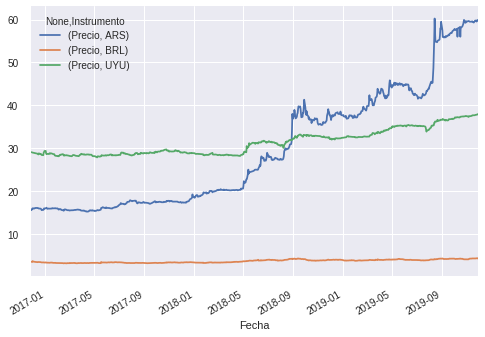

In [66]:
df_gr.interpolate().plot()

In [67]:
df_gr.head()

Precio             
Instrumento    ARS   BRL    UYU
Fecha                          
2016-11-28   15.49  3.41  29.02
2016-11-29   15.67  3.45  29.00
2016-11-30   15.85  3.41  28.95
2016-12-01   15.80  3.58  28.93
2016-12-02   15.92  3.48  28.90

In [68]:
import pandas_profiling

In [69]:
df_col = pd.DataFrame(df_gr.to_records())
df_col.head()

,Fecha,"('Precio', 'ARS')","('Precio', 'BRL')","('Precio', 'UYU')"
0,2016-11-28,15.49,3.41,29.02
1,2016-11-29,15.67,3.45,29.00
2,2016-11-30,15.85,3.41,28.95
3,2016-12-01,15.80,3.58,28.93
4,2016-12-02,15.92,3.48,28.90


In [70]:
df_col = df_col.set_index('Fecha').interpolate()

In [71]:
df_col.profile_report()

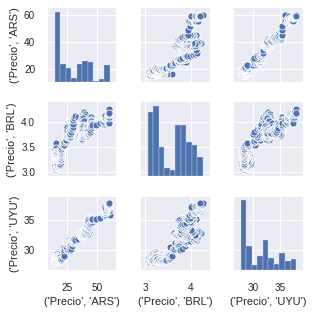

In [72]:
sns.pairplot(df_col, size=1.5)
#sns.pairplot(iris, hue='species', size=1.5);

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
df_col.columns

Index(['('Precio', 'ARS')', '('Precio', 'BRL')', '('Precio', 'UYU')'], dtype='object')

In [91]:
y=df_col["('Precio', 'ARS')"] #Me quedo con la columna objetivo

X=df_col.drop(["('Precio', 'ARS')"],axis=1) #Me quedo sin la columna objetivo

In [92]:
X.shape

(830, 2)

In [93]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
model.intercept_

-114.33300376506038

In [95]:
yfit = model.predict(X)

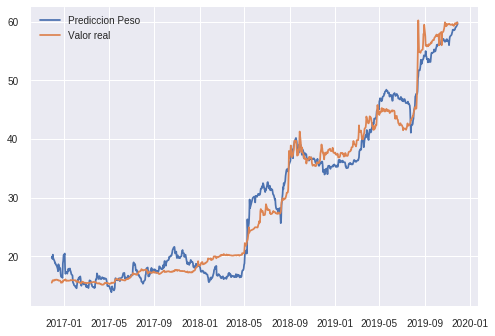

In [88]:
plt.plot(df_col.index, yfit, label='Prediccion Peso')
plt.plot(y, label='Valor real')
plt.legend()

# MACHINE LEARNING

In [96]:
y=df_col["('Precio', 'ARS')"] #Me quedo con la columna objetivo

X=df_col.drop(["('Precio', 'ARS')"],axis=1) #Me quedo sin la columna objetivo

In [97]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                random_state=42,
                                                shuffle=False,
                                                train_size=0.7,
                                                )

In [98]:
ytrain.shape

(581,)

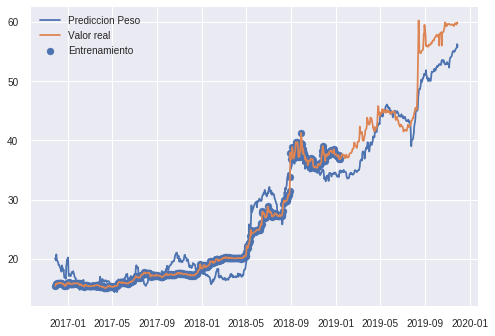

In [99]:
from sklearn.linear_model import LinearRegression # 1. choose model class
model = LinearRegression(fit_intercept=True) # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(X)             # 4. predict on new data

plt.plot(X.index, y_model, label='Prediccion Peso')
plt.plot(y, label='Valor real')
plt.scatter(Xtrain.index, ytrain, label='Entrenamiento')
plt.legend()

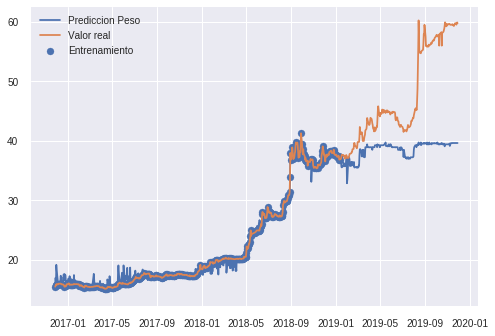

In [100]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(10)
forest.fit(Xtrain, ytrain)
y_model = forest.predict(X)

plt.plot(X.index, y_model, label='Prediccion Peso')
plt.plot(y, label='Valor real')
plt.scatter(Xtrain.index, ytrain, label='Entrenamiento')
plt.legend()

In [101]:
df_col.reset_index().to_feather('Divisas.feather')